In [1]:
import sys
if 'google.colab' in sys.modules:
    # Load the Drive helper and mount
    from google.colab import drive
    drive.mount('/content/drive')

In [ ]:
#Environment Creation -- One time -- can be commented after installation
# !pip install torch
# !pip install torchsummary
# !pip install torchvision
# !pip install tqdm
# !pip install matplotlib
# !pip install jupyterlab

In [3]:
import sys
if 'google.colab' in sys.modules:
# Add the directory containing your module to the Python path
  module_path = '/content/drive/MyDrive/Colab_Notebooks/Session5'
  sys.path.append(module_path)
  print(sys.path)

CODE BLOCK: 1

In [4]:
#Necessary Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from __future__ import print_function
import os

CODE BLOCK: 2

In [5]:
# CUDA? : To check whether running in GPU mode
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? False


CODE BLOCK: 3

In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3104,))
    ])

CODE BLOCK: 4

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

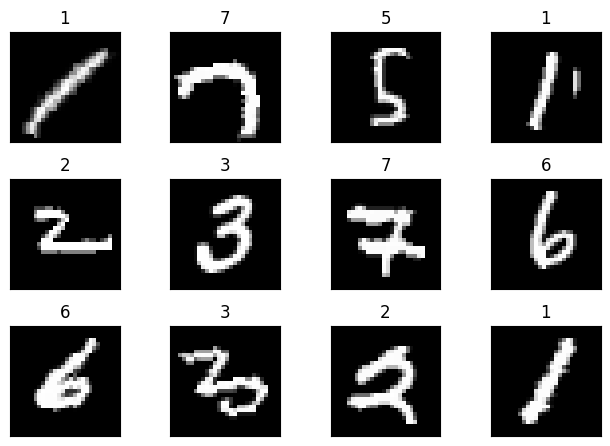

In [9]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [10]:
from model import Net

CODE BLOCK: 8

In [11]:
# Data palceholders to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [12]:
from utils import model_train, model_test

In [15]:
# Model Summary
from utils import get_summary

get_summary(Net(), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 10

In [13]:
# Put the model on selected device
model = Net().to(device)

# Optimization algorithm to update the weights
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Scheduler to change the learning rate after specific number of epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

# computes the negative log likelihood loss based on the log-softmax values and the target class index.
criterion = F.nll_loss

# Number of epochs for which model is to be trained
num_epochs = 20

# Iterate each epoch
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')

    # Train the model on training dataset and append the training loss and accuracy
    correct, processed, train_loss = model_train(model, device, train_loader, optimizer, criterion)
    train_acc.append(100 * correct / processed)
    train_losses.append(train_loss / len(train_loader))

    # Test the model's performance on test dataset and append the training loss and accuracy
    correct, test_loss = model_test(model, device, test_loader, criterion)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)
    
    # Update the learning rate after specified number of epochs
    scheduler.step()

/home/shiv-nlp-mldl-cv/anaconda3/envs/S5-VSCode/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


  0%|          | 0/118 [00:00<?, ?it/s]

Train: Loss=2.2070 Batch_id=117 Accuracy=23.02: 100%|██████████| 118/118 [02:26<00:00,  1.24s/it]


Test set: Average loss: 2.1775, Accuracy: 3080/10000 (30.80%)

Epoch 2


Train: Loss=0.1513 Batch_id=117 Accuracy=76.52: 100%|██████████| 118/118 [02:13<00:00,  1.13s/it]


Test set: Average loss: 0.1479, Accuracy: 9533/10000 (95.33%)

Epoch 3


Train: Loss=0.1768 Batch_id=117 Accuracy=94.78: 100%|██████████| 118/118 [02:17<00:00,  1.17s/it]


Test set: Average loss: 0.0825, Accuracy: 9728/10000 (97.28%)

Epoch 4


Train: Loss=0.0495 Batch_id=117 Accuracy=96.09: 100%|██████████| 118/118 [02:20<00:00,  1.19s/it]


Test set: Average loss: 0.0804, Accuracy: 9751/10000 (97.51%)

Epoch 5


Train: Loss=0.0577 Batch_id=117 Accuracy=96.84: 100%|██████████| 118/118 [02:36<00:00,  1.33s/it]


Test set: Average loss: 0.0538, Accuracy: 9821/10000 (98.21%)

Epoch 6


Train: Loss=0.1165 Batch_id=117 Accuracy=97.32: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Test set: Average loss: 0.0531, Accuracy: 9824/10000 (98.24%)

Epoch 7


Train: Loss=0.0123 Batch_id=117 Accuracy=97.59: 100%|██████████| 118/118 [02:23<00:00,  1.22s/it]


Test set: Average loss: 0.0415, Accuracy: 9877/10000 (98.77%)

Epoch 8


Train: Loss=0.1388 Batch_id=117 Accuracy=98.04: 100%|██████████| 118/118 [02:34<00:00,  1.31s/it]


Test set: Average loss: 0.0426, Accuracy: 9854/10000 (98.54%)

Epoch 9


Train: Loss=0.0832 Batch_id=117 Accuracy=98.03: 100%|██████████| 118/118 [02:16<00:00,  1.15s/it]


Test set: Average loss: 0.0369, Accuracy: 9881/10000 (98.81%)

Epoch 10


Train: Loss=0.0292 Batch_id=117 Accuracy=98.24: 100%|██████████| 118/118 [02:05<00:00,  1.06s/it]


Test set: Average loss: 0.0419, Accuracy: 9867/10000 (98.67%)

Epoch 11


Train: Loss=0.0491 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [02:16<00:00,  1.16s/it]


Test set: Average loss: 0.0322, Accuracy: 9896/10000 (98.96%)

Epoch 12


Train: Loss=0.0134 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [02:03<00:00,  1.05s/it]


Test set: Average loss: 0.0361, Accuracy: 9884/10000 (98.84%)

Epoch 13


Train: Loss=0.0591 Batch_id=117 Accuracy=98.49: 100%|██████████| 118/118 [02:04<00:00,  1.05s/it]


Test set: Average loss: 0.0281, Accuracy: 9907/10000 (99.07%)

Epoch 14


Train: Loss=0.0503 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]


Test set: Average loss: 0.0252, Accuracy: 9920/10000 (99.20%)

Epoch 15


Train: Loss=0.0422 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [02:20<00:00,  1.19s/it]


Test set: Average loss: 0.0263, Accuracy: 9912/10000 (99.12%)

Epoch 16


Train: Loss=0.0253 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [02:19<00:00,  1.18s/it]


Test set: Average loss: 0.0235, Accuracy: 9920/10000 (99.20%)

Epoch 17


Train: Loss=0.0207 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [02:11<00:00,  1.12s/it]


Test set: Average loss: 0.0231, Accuracy: 9921/10000 (99.21%)

Epoch 18


Train: Loss=0.0247 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [02:20<00:00,  1.19s/it]


Test set: Average loss: 0.0227, Accuracy: 9920/10000 (99.20%)

Epoch 19


Train: Loss=0.0666 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [02:19<00:00,  1.18s/it]


Test set: Average loss: 0.0227, Accuracy: 9922/10000 (99.22%)

Epoch 20


Train: Loss=0.0600 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [02:22<00:00,  1.21s/it]


Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)



CODE BLOCK: 11

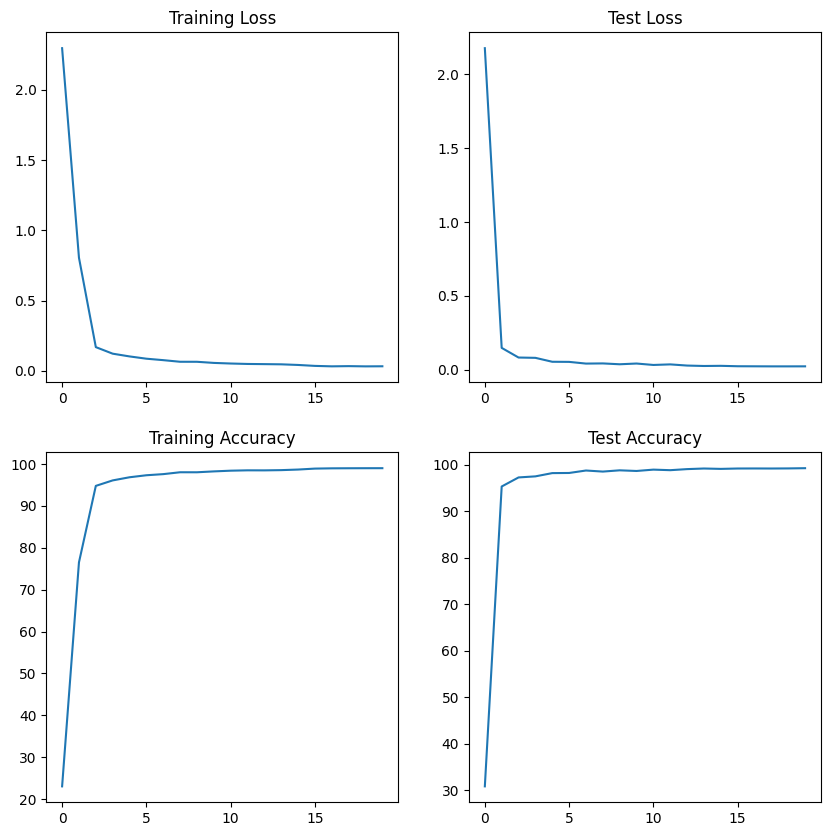

In [14]:
# Print loss and accuracy
from utils import display_loss_and_accuracies
display_loss_and_accuracies(train_losses, train_acc, test_losses, test_acc)